# 마스크와 투명 픽셀 비율 확인 및 줄기만 잡은 경우 필터링 시도

## 마스크 투명 픽셀 비율 확인을 위한 함수
- 마스크 픽셀 개수 / 이미지 크기 (w * h)

In [35]:
from PIL import Image

# 투명하지 않은 픽셀 개수 카운트 후 비율 반환
def count_not_transparent_pixel_ratio(image_path):
    # 이미지 로드
    img = Image.open(image_path)
    
    # RGBA 이미지로 변환 (필요한 경우)
    img = img.convert("RGBA")
    # 전체 픽셀 수
    w, h = img.size
    size = w * h
    
    # 픽셀 데이터 가져오기
    pixel_data = img.load()

    # 픽셀 수 초기화
    non_transparent_pixels = 0

    # 이미지 픽셀 순회하며 투명 여부 확인
    for x in range(w):
        for y in range(h):
            # 픽셀의 알파 값 가져오기 (0은 완전 투명, 255는 완전 불투명)
            alpha = pixel_data[x, y][3]
            if alpha != 0:
                non_transparent_pixels += 1

    return non_transparent_pixels / size

In [36]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# mask 출력
def visualize_mask(image_path):
    # 이미지 로드
    image_pil = Image.open(image_path)
    image = np.array(image_pil)

    plt.figure(figsize=(1, 1))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [37]:
import os

# 입력받은 폴더 속 이미지별 시각화, ratio 계산해 출력
def check_ratios_and_masks(base_folder):
    # ratios 저장
    ratios = []
    # 폴더 내 mask 순회하며 출력 및 ration 계산
    for file_name in os.listdir(base_folder):
        file_path = os.path.join(base_folder, file_name)
        # png 파일인지 확인
        if file_name[-3:] == "png":
            ratio = count_not_transparent_pixel_ratio(file_path)
            ratios.append(ratio)

            print(f"< file_name : {file_name} / ratio : {ratio}>")
            visualize_mask(file_path)

    # 최소 ratio, 평균 ratio 출력
    print(f"=== min ratio : {min(ratios)} / avg ratio : {sum(ratios)/len(ratios)} ===")

    return ratios

# 정렬된 df 기반으로 시각화 (출력 개수 제한, 입력이 -1이면 모두 출력)
def check_ratios_and_masks_sorted(base_folder, sorted_df, show_num=-1):
    if show_num < 0:
        show_num = sorted_df.shape[0]
        
    # ratios 저장
    ratios = []
    # 폴더 내 mask 순회하며 출력 및 ration 계산
    for i, file_name in enumerate(sorted_df["path"].values):
        file_path = os.path.join(base_folder, file_name)
        # png 파일인지 확인
        if file_name[-3:] == "png":
            ratio = count_not_transparent_pixel_ratio(file_path)
            ratios.append(ratio)

            # 보고싶은 이미지 개수만 출력되도록
            if i <= show_num:
                print(f"< file_name : {file_name} / ratio : {ratio}>")
                visualize_mask(file_path)

    # 최소 ratio, 평균 ratio 출력
    print(f"=== min ratio : {min(ratios)} / avg ratio : {sum(ratios)/len(ratios)} ===")

    return ratios

In [38]:
import pandas as pd

# base_folder = "/home/ubuntu/drive/dataset/preprocess_dataset/stem_image/"

# 폴더 순회하며 경로 및 ratio 구해 저장
def get_sorted_ratio_df(base_folder):
    file_names = []
    ratios = []
    for file_name in os.listdir(base_folder):
        file_path = os.path.join(base_folder, file_name)
        # png 파일인지 확인
        if file_name[-3:] == "png":
            ratio = count_not_transparent_pixel_ratio(file_path)
            ratios.append(ratio)
            file_names.append(file_name)

    df = pd.DataFrame(data=zip(file_names, ratios), columns=["path", "ratio"]).sort_values(by="ratio")
    return df

## case 확인
1. test data set 확인
2. 실제 데이터(딸기) 비율 확인
    - *: 최소 ratio가 55% 이하, 50% 초과
    - **: 50% 이하인 경우
    - 웬만하면 ratio 정렬해 시각화

### 1. test data set 확인
- 줄기가 중심으로 잡혔다고 해도 겹친 딸기가 조금씩 같이 마스크로 보이는... 모습
- 딸기 마스크 비율을 보고 임계값을 정해야할 것 같다.....
- 모든 경우를 필터링할 수는 없음

In [39]:
# # test data set

# base_folder = "/home/ubuntu/drive/dataset/preprocess_dataset/stem_image/"
# _ = check_ratios_and_masks(base_folder)

#### test data set ratio 기준으로 정렬해 시각화 해보기

< file_name : image_mask_14.png / ratio : 0.1365947350581855>


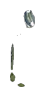

< file_name : image_mask_4.png / ratio : 0.17596319723979298>


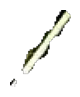

< file_name : image_mask_5 copy.png / ratio : 0.1894370651486401>


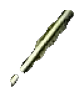

< file_name : image_mask_44.png / ratio : 0.21727272727272728>


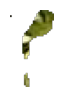

< file_name : image_mask_1.png / ratio : 0.2777777777777778>


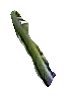

< file_name : image_mask_29.png / ratio : 0.2975609756097561>


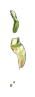

< file_name : image_mask_4 copy.png / ratio : 0.3128415300546448>


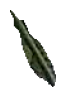

< file_name : image_mask_2 copy.png / ratio : 0.3697478991596639>


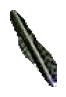

< file_name : image_mask_44 copy.png / ratio : 0.3895551257253385>


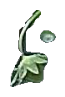

< file_name : image_mask_31.png / ratio : 0.3965080971659919>


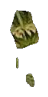

< file_name : image_mask_3.png / ratio : 0.4185823754789272>


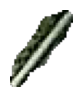

< file_name : image_mask_6.png / ratio : 0.42470588235294116>


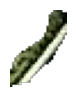

< file_name : image_mask_7.png / ratio : 0.43148148148148147>


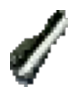

< file_name : image_mask_70.png / ratio : 0.43306693306693306>


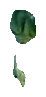

< file_name : image_mask_18.png / ratio : 0.4708441318030359>


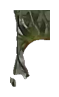

< file_name : image_mask_27.png / ratio : 0.4963718820861678>


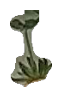

< file_name : image_mask_26 copy.png / ratio : 0.524440836940837>


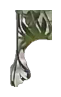

< file_name : image_mask_30 copy.png / ratio : 0.5245833333333333>


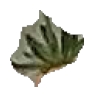

< file_name : image_mask_22.png / ratio : 0.5303030303030303>


< file_name : image_mask_48 copy.png / ratio : 0.5379310344827586>


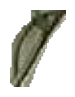

< file_name : image_mask_5.png / ratio : 0.5601118359739049>


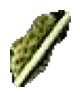

< file_name : image_mask_40.png / ratio : 0.5705009276437848>


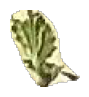

< file_name : image_mask_42.png / ratio : 0.6212121212121212>


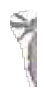

< file_name : image_mask_2.png / ratio : 0.6280788177339901>


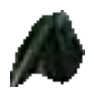

< file_name : image_mask_3 copy.png / ratio : 0.6891304347826087>


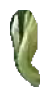

< file_name : image_mask_10.png / ratio : 0.696969696969697>


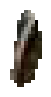

< file_name : image_mask_7 copy.png / ratio : 0.701010101010101>


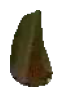

< file_name : image_mask_43.png / ratio : 0.7322368421052632>


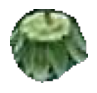

< file_name : image_mask_28.png / ratio : 0.7386416861826698>


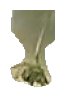

< file_name : image_mask_26.png / ratio : 0.7459183673469387>


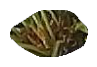

< file_name : image_mask_37.png / ratio : 0.7637292464878672>


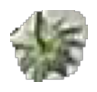

< file_name : image_mask_30.png / ratio : 0.7870967741935484>


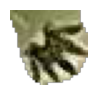

< file_name : image_mask_21.png / ratio : 0.8>


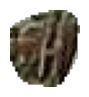

< file_name : image_mask_48.png / ratio : 0.8833333333333333>


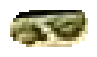

=== min ratio : 0.1365947350581855 / avg ratio : 0.5139276540152292 ===


In [40]:
base_folder = "/home/ubuntu/drive/dataset/preprocess_dataset/stem_image/"
_ = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder))

### 2. 적당히 딸기가 있는 랜덤한 날(1)
- F0016-C101-20211203-125903
- 최소 ratio: 0.539049...

In [41]:
# base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20211203-125903/masks/"
# _ = check_ratios_and_masks(base_folder)

< file_name : image_mask_9.png / ratio : 0.5390492359932089>


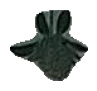

< file_name : image_mask_15.png / ratio : 0.5421505376344086>


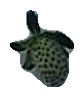

< file_name : image_mask_10.png / ratio : 0.5591794569067297>


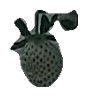

< file_name : image_mask_17.png / ratio : 0.7032590051457976>


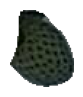

< file_name : image_mask_8.png / ratio : 0.7353515625>


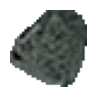

< file_name : image_mask_18.png / ratio : 0.7447359896339488>


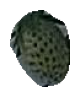

=== min ratio : 0.5390492359932089 / avg ratio : 0.7491168339980889 ===
=== min ratio : 0.5390492359932089 / avg ratio : 0.7491168339980889 ===


In [42]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20211203-125903/masks/"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)
print(f"=== min ratio : {min(ratios)} / avg ratio : {sum(ratios)/len(ratios)} ===")

### 적당히 딸기가 있는 랜덤한 날(2)
- F0016-C101-20230214-123510
- 최소 ratio: 0.64597014...

< file_name : image_mask_18.png / ratio : 0.6459701492537313>


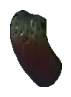

< file_name : image_mask_3.png / ratio : 0.6994594594594594>


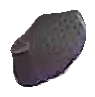

< file_name : image_mask_21.png / ratio : 0.7083618136249715>


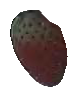

< file_name : image_mask_20.png / ratio : 0.715820895522388>


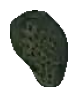

< file_name : image_mask_10.png / ratio : 0.7173479561316052>


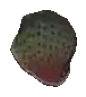

< file_name : image_mask_11.png / ratio : 0.7241379310344828>


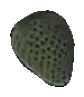

=== min ratio : 0.6459701492537313 / avg ratio : 0.7505559557501378 ===


In [43]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20230214-123510/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### **적당히 딸기가 있는 랜덤한 날(3)
- F0016-C101-20230308-083300
- 최소 ratio: 0.496567... <- 하.. 이것 참 문제네.................
- 대각선으로 잘려 보이는 딸기들이 문제. 만약 비율로 필터링하게 되면 이처럼 대각선으로 잘려 보이는 딸기까지 없어질듯..

< file_name : image_mask_45.png / ratio : 0.4965675057208238>


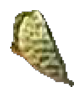

< file_name : image_mask_2.png / ratio : 0.49825740602439633>


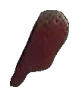

< file_name : image_mask_44.png / ratio : 0.5703500343170899>


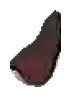

< file_name : image_mask_64.png / ratio : 0.6137648809523809>


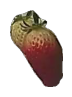

< file_name : image_mask_49.png / ratio : 0.6182506626277925>


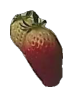

< file_name : image_mask_53.png / ratio : 0.6214880332986472>


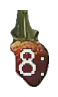

=== min ratio : 0.4965675057208238 / avg ratio : 0.7350283277617548 ===


In [44]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20230308-083300/masks/"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(4)
- F0016-C101-20240402-084247
- 최소 ratio: 0.660869...

< file_name : image_mask_13.png / ratio : 0.6608695652173913>


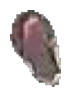

< file_name : image_mask_3.png / ratio : 0.6690464048954615>


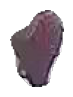

< file_name : image_mask_1.png / ratio : 0.6904197461999722>


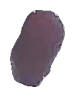

< file_name : image_mask_7.png / ratio : 0.6958204334365325>


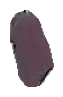

< file_name : image_mask_20.png / ratio : 0.707936507936508>


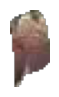

< file_name : image_mask_2.png / ratio : 0.7198938992042441>


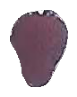

=== min ratio : 0.6608695652173913 / avg ratio : 0.7574642798795325 ===


In [45]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20240402-084247/masks/"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### *적당히 딸기가 있는 랜덤한 날(5)
- F0016-C101-20220221-085000
- 최소 ratio : 0.5292875246409462

< file_name : image_mask_34.png / ratio : 0.5292875246409462>


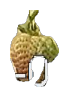

< file_name : image_mask_43.png / ratio : 0.5985416666666666>


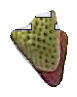

< file_name : image_mask_2.png / ratio : 0.6281396338867603>


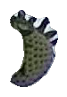

< file_name : image_mask_45.png / ratio : 0.6294554455445545>


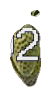

< file_name : image_mask_39.png / ratio : 0.6340269277845777>


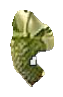

< file_name : image_mask_10.png / ratio : 0.6607347876004592>


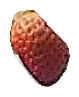

=== min ratio : 0.5292875246409462 / avg ratio : 0.7451263916885337 ===


In [46]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20220221-085000/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(6)
- F0016-C101-20220417-083000
- 최소 ratio : 0.6836868290128306

< file_name : image_mask_25.png / ratio : 0.6836868290128306>


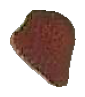

< file_name : image_mask_21.png / ratio : 0.7222222222222222>


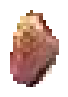

< file_name : image_mask_13.png / ratio : 0.7234848484848485>


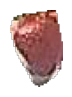

< file_name : image_mask_7.png / ratio : 0.728110599078341>


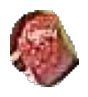

< file_name : image_mask_8.png / ratio : 0.7324478178368121>


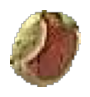

< file_name : image_mask_15.png / ratio : 0.7415204678362574>


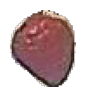

=== min ratio : 0.6836868290128306 / avg ratio : 0.7797776073550446 ===


In [47]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20220417-083000/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(7)
- F0016-C101-20220205-084500
- 최소 ratio : 0.5639187574671446
- 이 경우에도 비스듬히 잘린 딸기가 있음 (다행히 55% 이상)

< file_name : image_mask_33.png / ratio : 0.5639187574671446>


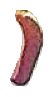

< file_name : image_mask_30.png / ratio : 0.6130952380952381>


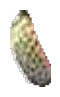

< file_name : image_mask_60.png / ratio : 0.636986301369863>


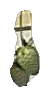

< file_name : image_mask_50.png / ratio : 0.6421911421911422>


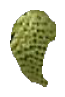

< file_name : image_mask_29.png / ratio : 0.6698841698841699>


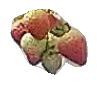

< file_name : image_mask_55.png / ratio : 0.6756892230576441>


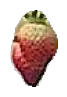

=== min ratio : 0.5639187574671446 / avg ratio : 0.7428197222990349 ===


In [48]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20220205-084500/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(8)
- F0016-C101-20230104-083734
- 최소 ratio : 0.6318027210884354

< file_name : image_mask_1.png / ratio : 0.6318027210884354>


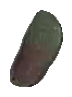

< file_name : image_mask_6.png / ratio : 0.6560922855082912>


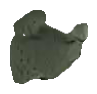

< file_name : image_mask_5.png / ratio : 0.6963133640552995>


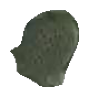

< file_name : image_mask_2.png / ratio : 0.7073039742212675>


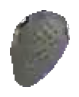

< file_name : image_mask_10.png / ratio : 0.7183908045977011>


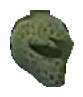

< file_name : image_mask_11.png / ratio : 0.7336197636949516>


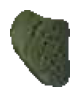

=== min ratio : 0.6318027210884354 / avg ratio : 0.734461893060894 ===


In [49]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20230104-083734/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(9)
- F0016-C101-20230301-123434
- 최소 ratio : 0.5750868055555556

< file_name : image_mask_5.png / ratio : 0.5750868055555556>


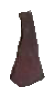

< file_name : image_mask_2.png / ratio : 0.6122448979591837>


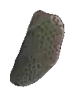

< file_name : image_mask_39.png / ratio : 0.6505706760316067>


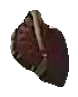

< file_name : image_mask_22.png / ratio : 0.6592632719393283>


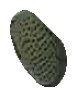

< file_name : image_mask_15.png / ratio : 0.6759259259259259>


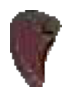

< file_name : image_mask_34.png / ratio : 0.7075268817204301>


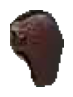

=== min ratio : 0.5750868055555556 / avg ratio : 0.7524007372409716 ===


In [50]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20230301-123434/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(10)
- F0016-C101-20221030-163843
- 최소 ratio : 0.7642205818497612

< file_name : image_mask_4.png / ratio : 0.7642205818497612>


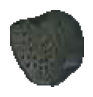

< file_name : image_mask_2.png / ratio : 0.7665024630541872>


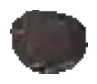

< file_name : image_mask_1.png / ratio : 0.7821297429620563>


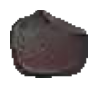

< file_name : image_mask_6.png / ratio : 0.7888888888888889>


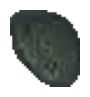

< file_name : image_mask_3.png / ratio : 0.7946127946127947>


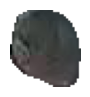

< file_name : image_mask_5.png / ratio : 0.8121432278152568>


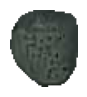

=== min ratio : 0.7642205818497612 / avg ratio : 0.7847496165304908 ===


In [51]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20221030-163843/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### *적당히 딸기가 있는 랜덤한 날(11)
- F0017-C101-20211216-083100
- 최소 ratio : 0.5188492063492064

< file_name : image_mask_9.png / ratio : 0.5188492063492064>


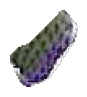

< file_name : image_mask_4.png / ratio : 0.6049910873440285>


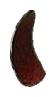

< file_name : image_mask_15.png / ratio : 0.6871069182389937>


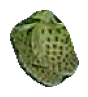

< file_name : image_mask_21.png / ratio : 0.7041666666666667>


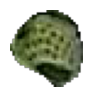

< file_name : image_mask_7.png / ratio : 0.7168>


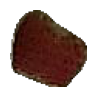

< file_name : image_mask_11.png / ratio : 0.7173951828724353>


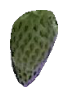

=== min ratio : 0.5188492063492064 / avg ratio : 0.7604963012008065 ===


In [52]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20211216-083100/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### **적당히 딸기가 있는 랜덤한 날(12)
- F0017-C101-20220118-083000
- 최소 ratio : 0.20973044049967127 <- 이 마스크를.. 딸기라고.. 봐도 돼?
- 2번째로 작은 ratio: 0.6161684782608695

< file_name : image_mask_24.png / ratio : 0.20973044049967127>


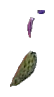

< file_name : image_mask_20.png / ratio : 0.6161684782608695>


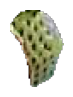

< file_name : image_mask_15.png / ratio : 0.6431486880466473>


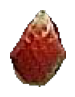

< file_name : image_mask_54.png / ratio : 0.6438778369291118>


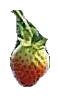

< file_name : image_mask_47.png / ratio : 0.6475464190981433>


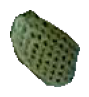

< file_name : image_mask_8.png / ratio : 0.6513687600644122>


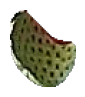

=== min ratio : 0.20973044049967127 / avg ratio : 0.7400147239831594 ===


In [53]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20220118-083000/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### **적당히 딸기가 있는 랜덤한 날(13)
- F0017-C101-20220216-083000
- 최소 ratio : 0.4956386292834891
- 딸기가 많이 겹쳐있다 보니 생기는 문제인듯

< file_name : image_mask_6.png / ratio : 0.4956386292834891>


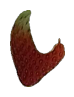

< file_name : image_mask_4.png / ratio : 0.5401515151515152>


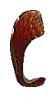

< file_name : image_mask_2.png / ratio : 0.5462025316455696>


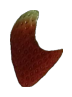

< file_name : image_mask_8.png / ratio : 0.5950933564915328>


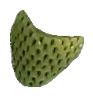

< file_name : image_mask_7.png / ratio : 0.6018099547511312>


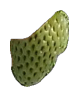

< file_name : image_mask_16.png / ratio : 0.6251558687991325>


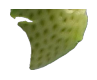

=== min ratio : 0.4956386292834891 / avg ratio : 0.736024792373029 ===


In [54]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20220216-083000/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(14)
- F0017-C101-20220312-083000
- 최소 ratio : 0.5879103535353535

< file_name : image_mask_15.png / ratio : 0.5879103535353535>


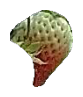

< file_name : image_mask_16.png / ratio : 0.6402116402116402>


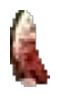

< file_name : image_mask_65.png / ratio : 0.643649373881932>


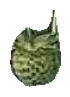

< file_name : image_mask_1.png / ratio : 0.6782911944202267>


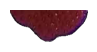

< file_name : image_mask_48.png / ratio : 0.6870748299319728>


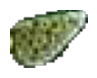

< file_name : image_mask_47.png / ratio : 0.6896551724137931>


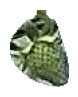

=== min ratio : 0.5879103535353535 / avg ratio : 0.7592006217197435 ===


In [55]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20220312-083000/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(15)
- F0017-C101-20220415-083000
- 최소 ratio : 0.5748393021120294

< file_name : image_mask_12.png / ratio : 0.5748393021120294>


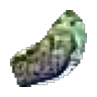

< file_name : image_mask_28.png / ratio : 0.591830985915493>


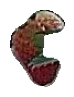

< file_name : image_mask_15.png / ratio : 0.6026077097505669>


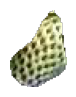

< file_name : image_mask_1.png / ratio : 0.6872632575757576>


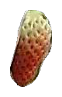

< file_name : image_mask_36.png / ratio : 0.7060957910014514>


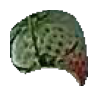

< file_name : image_mask_25.png / ratio : 0.7164351851851852>


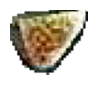

=== min ratio : 0.5748393021120294 / avg ratio : 0.7661341008332747 ===


In [56]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20220415-083000/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### **적당히 딸기가 있는 랜덤한 날(16)
- F0017-C101-20221117-123317
- 최소 ratio : 0.7839506172839507

< file_name : image_mask_2.png / ratio : 0.7839506172839507>


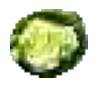

< file_name : image_mask_1.png / ratio : 0.7943349753694581>


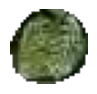

< file_name : image_mask_3.png / ratio : 0.8095238095238095>


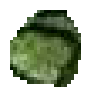

=== min ratio : 0.7839506172839507 / avg ratio : 0.7959364673924062 ===


In [57]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20221117-123317/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(17)
- F0017-C101-20221215-083129
- 최소 ratio : 0.5945479641131816

< file_name : image_mask_1.png / ratio : 0.5945479641131816>


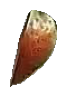

< file_name : image_mask_23.png / ratio : 0.6494252873563219>


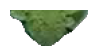

< file_name : image_mask_5.png / ratio : 0.7217893217893218>


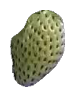

< file_name : image_mask_4.png / ratio : 0.7238421955403087>


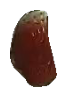

< file_name : image_mask_8.png / ratio : 0.7537878787878788>


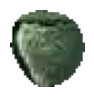

< file_name : image_mask_2.png / ratio : 0.7574484339190222>


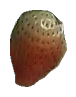

=== min ratio : 0.5945479641131816 / avg ratio : 0.7700175003325048 ===


In [58]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20221215-083129/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(18)
- F0017-C101-20230117-083006
- 최소 ratio : 0.5777777777777777

< file_name : image_mask_42.png / ratio : 0.5777777777777777>


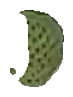

< file_name : image_mask_28.png / ratio : 0.631310266591038>


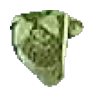

< file_name : image_mask_31.png / ratio : 0.665079365079365>


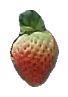

< file_name : image_mask_34.png / ratio : 0.6662004662004662>


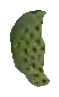

< file_name : image_mask_18.png / ratio : 0.7112010796221323>


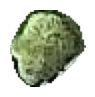

< file_name : image_mask_37.png / ratio : 0.7173174872665535>


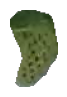

=== min ratio : 0.5777777777777777 / avg ratio : 0.768439900659584 ===


In [59]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20230117-083006/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(19)
- F0017-C101-20230215-083006
- 최소 ratio : 0.6375

< file_name : image_mask_55.png / ratio : 0.6375>


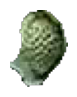

< file_name : image_mask_40.png / ratio : 0.6893939393939394>


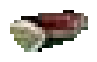

< file_name : image_mask_52.png / ratio : 0.698595146871009>


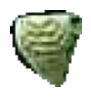

< file_name : image_mask_54.png / ratio : 0.7027159886936217>


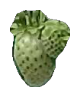

< file_name : image_mask_44.png / ratio : 0.7056159420289855>


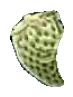

< file_name : image_mask_18.png / ratio : 0.7089077412513256>


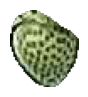

=== min ratio : 0.6375 / avg ratio : 0.7701887439689924 ===


In [60]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20230215-083006/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

### 적당히 딸기가 있는 랜덤한 날(20)
- F0017-C101-20230319-084005
- 최소 ratio : 0.5477453580901857

< file_name : image_mask_8.png / ratio : 0.5477453580901857>


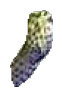

< file_name : image_mask_39.png / ratio : 0.6323251417769377>


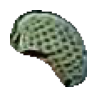

< file_name : image_mask_1.png / ratio : 0.6353822427847543>


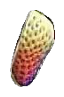

< file_name : image_mask_29.png / ratio : 0.6457142857142857>


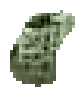

< file_name : image_mask_40.png / ratio : 0.645753559155621>


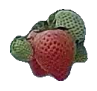

< file_name : image_mask_35.png / ratio : 0.6863799283154122>


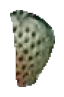

=== min ratio : 0.5477453580901857 / avg ratio : 0.7598833563224647 ===


In [61]:
base_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20230319-084005/masks"
ratios = check_ratios_and_masks_sorted(base_folder, get_sorted_ratio_df(base_folder), 5)

----

# 임계값 정해 필터링 해보기

- 임계값은 0.490000 이하면 제거하도록 설정

In [62]:
import shutil

# 임계값 N 에 맞춰 base_folder 안에 있는 이미지에 대해 필터링 진행
N = 0.49

def filter_stem_case(input_folder, result_folder):
    if not os.path.exists(result_folder):
        os.mkdir(result_folder)

    for file_name in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file_name)
        result_path = os.path.join(result_folder, input_folder.split("/")[-2] + "_" + file_name)
        # png 파일인지 확인
        if file_name[-3:] == "png":
            ratio = count_not_transparent_pixel_ratio(file_path)
            # 임계값보다 작으면 (없어질 애들)
            if ratio <= N:
                # 결과 확인을 위해 다른 폴더에 복사해 저장하도록
                shutil.copy2(file_path, result_path)

In [63]:
# test case filtering
input_folder = "/home/ubuntu/drive/dataset/preprocess_dataset/stem_image/"
result_folder = "./result/"
filter_stem_case(input_folder, result_folder)

In [64]:
# F0016 test case 1
input_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20220326-083000/masks"
result_folder = "./result/"
filter_stem_case(input_folder, result_folder)

# F0016 test case 2
input_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20230301-083255/masks"
result_folder = "./result/"
filter_stem_case(input_folder, result_folder)

# F0016 test case 3
input_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0016/C101/F0016-C101-20240108-124449/masks"
result_folder = "./result/"
filter_stem_case(input_folder, result_folder)

In [65]:
# F0017 test case 1
input_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20220323-083000/masks"
result_folder = "./result/"
filter_stem_case(input_folder, result_folder)

# F0017 test case 2
input_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20230331-083736/masks"
result_folder = "./result/"
filter_stem_case(input_folder, result_folder)

# F0017 test case 3
input_folder = "/home/ubuntu/drive/dataset/SAM_result2/F0017/C101/F0017-C101-20240320-084404/masks"
result_folder = "./result/"
filter_stem_case(input_folder, result_folder)

< file_name : stem_image_image_mask_14.png / ratio : 0.1365947350581855>


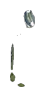

< file_name : stem_image_image_mask_4.png / ratio : 0.17596319723979298>


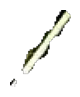

< file_name : stem_image_image_mask_5 copy.png / ratio : 0.1894370651486401>


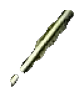

< file_name : stem_image_image_mask_44.png / ratio : 0.21727272727272728>


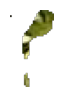

< file_name : stem_image_image_mask_1.png / ratio : 0.2777777777777778>


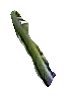

< file_name : stem_image_image_mask_29.png / ratio : 0.2975609756097561>


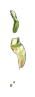

< file_name : stem_image_image_mask_4 copy.png / ratio : 0.3128415300546448>


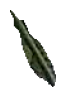

< file_name : F0016-C101-20220326-083000_image_mask_24.png / ratio : 0.3569503273007316>


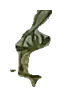

< file_name : stem_image_image_mask_2 copy.png / ratio : 0.3697478991596639>


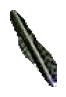

< file_name : stem_image_image_mask_44 copy.png / ratio : 0.3895551257253385>


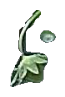

< file_name : stem_image_image_mask_31.png / ratio : 0.3965080971659919>


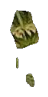

< file_name : stem_image_image_mask_3.png / ratio : 0.4185823754789272>


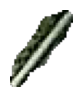

< file_name : stem_image_image_mask_6.png / ratio : 0.42470588235294116>


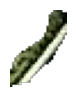

< file_name : stem_image_image_mask_7.png / ratio : 0.43148148148148147>


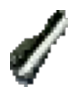

< file_name : stem_image_image_mask_70.png / ratio : 0.43306693306693306>


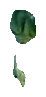

< file_name : stem_image_image_mask_18.png / ratio : 0.4708441318030359>


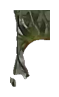

=== min ratio : 0.1365947350581855 / avg ratio : 0.3311806413560356 ===


In [66]:
ratios = check_ratios_and_masks_sorted(result_folder, get_sorted_ratio_df(result_folder))